In [2]:
import numpy as np
import sympy
import cmath
from sympy import Symbol, simplify
from sympy.solvers import solve

In [36]:
Vo = Symbol("Vo")
Vr = Symbol("Vr")
Ir = Symbol("Ir")
Ic = Symbol("Ic")
Il = Symbol("Il")
r = Symbol("r")
omega = Symbol("omega")
c = Symbol("c")
l = Symbol("l")


Eq = (Vr + Vo -1, 
      Ir - Ic - Il, 
      Vr - r * Ir,
      Vo - Ic / 1j*omega*c, 
      Vo - 1j*omega*l*Il)

sol = solve(Eq, (Vr, Vo, Ir, Ic, Il))
Vos = simplify(sol[Vo])
Vos

c*l*omega/(c*l*omega - I*c*r + I*l*r)

TypeError: bad operand type for abs(): 'Tuple'

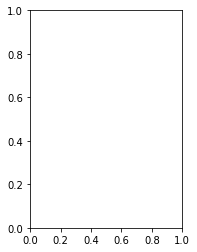

In [34]:
numvalue = {c: 10**-6, l: 10**-3}
vosnum = Vos.subs(numvalue)
flist = [vosnum.subs({r: 100.0*3**s}) for s in range(0, 4)]
omega_axis = np.linspace(20000, 43246, 100)
plt.subplot(121)

plt.plot(omega_axis, zip(*[[abs(f.subs({omega: o})) for o in omega_axis] 
                                                    for f in flist]))
plt.xlim(20000, 43246)
plt.ylim(0, 1)
plt.xlabel('omega')
plt.ylabel('Abs[vo]')
plt.xticks([20000, 30000, 40000])

plt.subplot(122)
plt.show()


C:\Users\Rene\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


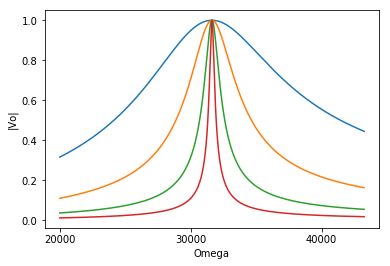

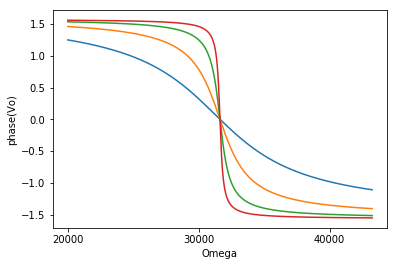

In [39]:
import matplotlib.pyplot as plt

C = 1e-6
L = 1e-3
Resistance = (100, 300, 900, 2700)
omega = np.linspace(20000,43246,1e6)

def Vo(omega):
    C = 1e-6
    L = 1e-3
    return (-1j*omega*L)/(-1j*omega*L - R + R*C*L*omega*omega)

for k in range(len(Resistance)):
    R = Resistance[k]
    Vos = []
    for i in range(len(omega)):
        w = omega[i]
        Vos.append(Vo(w))
    plt.plot(omega,np.abs(Vos))
plt.xlabel("Omega")
plt.ylabel("|Vo|")
plt.xticks([20000, 30000, 40000])
plt.show()

for k in range(len(Resistance)):
    R = Resistance[k]
    Vos = []
    for i in range(len(omega)):
        w = omega[i]
        Vos.append(Vo(w))
    plt.plot(omega,np.angle(Vos))
plt.xlabel("Omega")
plt.ylabel("phase(Vo)")
plt.xticks([20000, 30000, 40000])
plt.show()

        
        
        
    

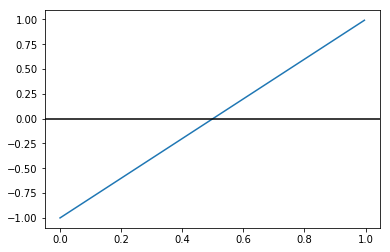

In [5]:
w_r = 1/np.sqrt(L*C) #resonantfrequency
T = 256 #Selected N
t = np.arange(0,T)
def vsaw(t):
    return -1+2*(t/T)
alist = []

for i in range(256):
    a = vsaw((i)/256)
    alist.append(a)
w_r = 1/np.sqrt(L*C)
blist = np.sqrt(T)*np.fft.fft(alist)

plt.plot(t/T,alist)
plt.axhline(y=0, color = "k")
plt.show()


SystemError: <built-in function hasattr> returned a result with an error set

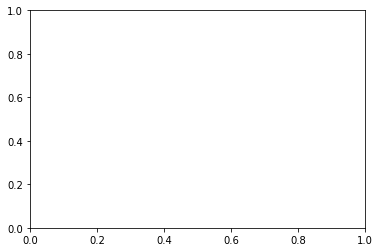

In [37]:
def plot3(f, r):
    volist = [],0
    s1 = np.arange(-127,0)
    s2 = 0.0
    s3 = np.arange(1,129)
    
    for i in s:
        w_i = f * w_r #Omega_i (2Pi/T) == Resonance Frequency * Resonance
        omega = w_i*i
        r = omega/f` # == w_r
        new_vos = np.abs(Vo(r))
        volist.append(new_vos)
    plt.plot(t/T, volist)
    plt.axhline(0)
    plt.show()
    
plot3(1, 2700.0)
plot3(1/3., 200.0)
plot3(3.0, 5.0)


In [33]:
def plot3(f, r):
    w_i = f * w_r #Omega_i (2Pi/T) == Resonance Frequency * Resonance
    volist = np.concatenate(([complex(Vos.subs({omega: w_i*s, r:w}).evalf()) for s in np.arange(1, 129)][0.0],
                             [complex(Vos.subs({omega: w_i*s, r:w}).evalf()) for s in np.arange(-127, 0)]))
    vtrans = np.fft.ifft(blist * volist)
    plotlist = np.array([[(k+1)/256., vtrans[k%256]] for k in range(768)])
    plt.plot(plotlist[:,0], plotlist[:,1])
    plt.axhline(0)
    plt.show()

plot3(1, 2700.0)
plot3(1/3., 200.0)
plot3(3.0, 5.0)



AttributeError: 'Tuple' object has no attribute 'evalf'